<h1 align="center">Scientific Programming in Python</h1>
<h2 align="center">Topic 2: NumPy and Efficient Numerical Programming</h2> 

_Notebook created by Martín Villanueva - `martin.villanueva@usm.cl` - DI UTFSM - April 2017._

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def image_plot(data, title='FITS image'):
    plt.figure(figsize=(10,10))
    im = plt.imshow(data, cmap=plt.cm.afmhot, interpolation=None)
    plt.title(title)
    #plt.axis('off')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

In [2]:
# first we load the data:
data = np.load("orion.npy")

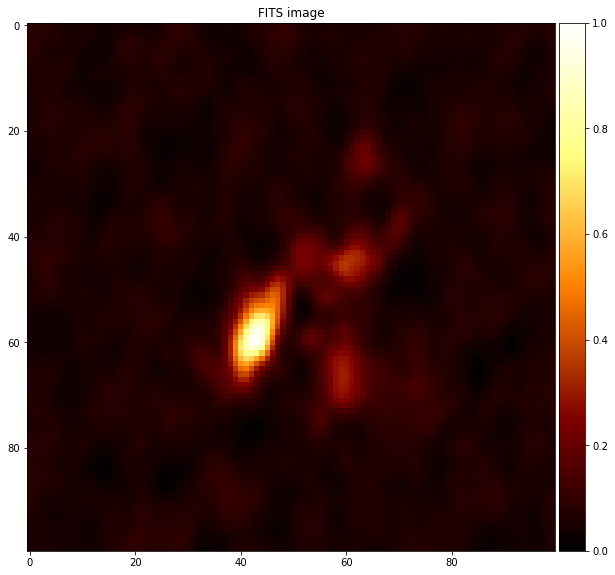

In [3]:
image_plot(data)

### Paso 1) 

Calcular el `RMS` de la imagen entregada. 

$$RMS = \sqrt{\frac{1}{m\ n} \sum_{i=1}^m \sum_{j=1}^n \texttt{data[i,j]}^2}$$

__Nota:__ Computarlo de forma vectorizada.

### Paso 2) 

Genere otro arreglo donde los pixeles con intensidades por debajo del `RMS` son considerados como _no usables_ (con valor `=0`).  Mostrar tal imagen resultante.

### Paso 3)

Crear la función
```python
def apply_filter(data, mask, kernel_filter):
    ...
    return None
```
Que reciba el arreglo de datos completo `data`, el arreglo booleano con los __pixeles usables__ `mask` (sobre el RMS), y kernel de filtro de `3x3`. La función debe convolucionar `filter` sobre la imagen `data`, sólo en los pixeles usables. La función no debe retornar nada, pero debe modificar `data` de forma _in place_.

Finalmente mostrar el resultado de convolucionar tal filtro en `data` (mostrar imágen).

__Nota:__ Debe usar siempre que pueda _instrucciones vectorizadas_ y operaciones _inplace_.

__Image convolution:__ https://en.wikipedia.org/wiki/Kernel_(image_processing)#Convolution

In [4]:
# Gaussian blur filter: Ocupar este filtro!
kernel_filter = 1./16. * np.array([[1,2,1], [2,4,2], [1,2,1]])
print(kernel_filter)

[[ 0.0625  0.125   0.0625]
 [ 0.125   0.25    0.125 ]
 [ 0.0625  0.125   0.0625]]


## Solución

### Paso 1)

In [5]:
rms = np.sqrt( 1./(data.shape[0]*data.shape[1]) * np.sum(data**2) )

### Paso 2)

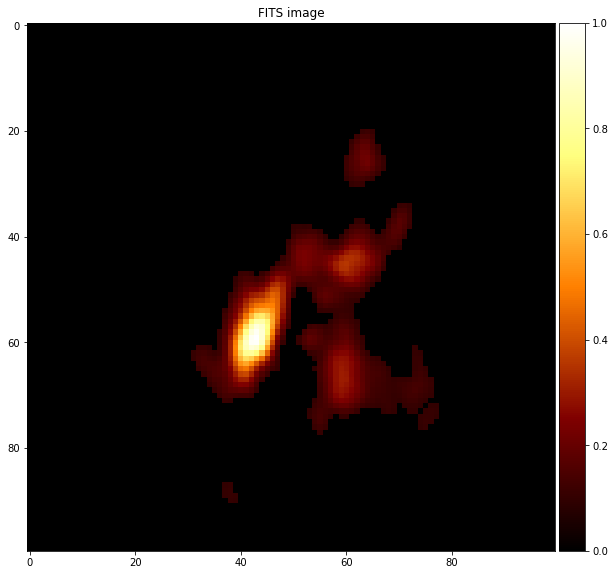

In [6]:
_data = np.copy(data)
mask = _data<rms
_data[mask] = 0.

image_plot(_data)

### Paso 3)

In [7]:
def apply_filter(data, mask, kernel_filter):
    m,n = data.shape
    _data = data.copy()
    for i in range(m):
        for j in range(n):
            if not mask[i,j]: continue
            data[i,j] = np.sum(_data[i-1:i+2,j-1:j+2]*kernel_filter)

In [8]:
apply_filter(data, ~mask, kernel_filter)

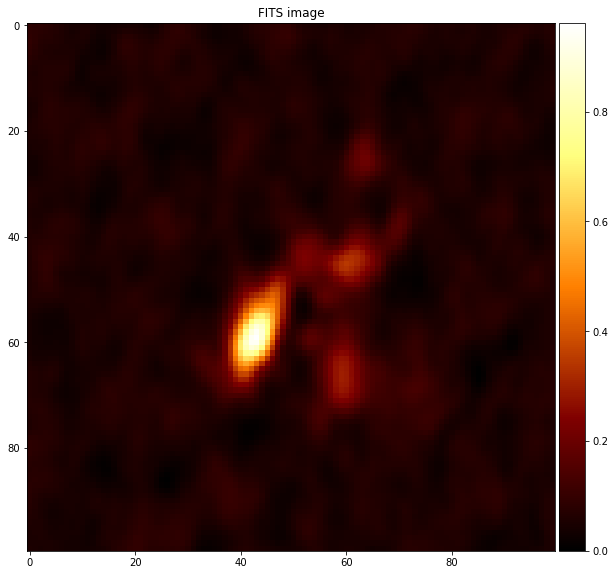

In [9]:
image_plot(data)